# Predicting Breast Cancer Classifications through Exploratory Data Analysis and Supervised Machine Learning

## DTSA 5509 Final Project

**Author:** Rachel VanOsdol  
**Date:** October, 2023

GitHub repo: https://github.com/rvanosdol/BreastCancerPredictions

## Description of supervised learning problem 

**Project Description:** Breast cancer is a critical healthcare concern, and accurate classification is pivotal for timely diagnosis and effective treatment. In this exploratory data analysis (EDA) project, machine learning techniques such as logistic regression and support vector machines are used to predict breast cancer classifications with precision.

**Dataset Overview:** Each data point or observation represents a breast tumor. The target variable, "diagnosis" classifies the tumor as either "M" for Malignant or "B" for Benign. The other features provides valuable information about the shape, size, texture, and other properties of the tumors. These features are often extracted from images or other diagnostic tests. 
 
The breast-cancer.csv dataset used in this EDA is available on Kaggle: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

The columns in this dataset are described below: 
* **id:** Unique ID for each observation. 
* **diagnosis:** The target variable that classifies the tumor as either "M" for Malignant or "B" for Benign.
* **radius_mean:** The mean of distances from the center of the tumor to points on its perimeter. It represents the average size of the radius of the tumor.
* **texture_mean:** A measure of the variation in grayscale intensity in the image, which reflects the texture of the tumor.
* **perimeter_mean:** The average circumference or length of the tumor's boundary.
* **area_mean:** The average size of the tumor's area, calculated as π times the square of the radius_mean.
* **smoothness_mean:** A measure of the smoothness of the tumor's boundary. It quantifies how irregular or rough the tumor's perimeter is.
* **compactness_mean:** Combines information about the perimeter and area to describe the compactness or shape of the tumor.
* **concavity_mean:** Measures the severity of concave portions of the tumor boundary. It quantifies the presence of inward dents or hollow areas.
* **concave points_mean:** The number of concave points or inflection points on the tumor's boundary.
* **symmetry_mean:** A measure of symmetry in the tumor's shape.
* **fractal_dimension_mean:** A measure of the complexity of the tumor's boundary, often used for characterizing irregular shapes.
* **radius_se:** The standard error of the radius, providing information about the variability of the radius measurements.
* **texture_se:** The standard error of the texture measurements, indicating the variability in texture across samples.
* **perimeter_se**: The standard error of the perimeter measurements, providing information about the variability in perimeter estimates.
* **area_se:** The standard error of the area measurements, indicating the variability in area estimates.
* **smoothness_se:** The standard error of the smoothness measurements, reflecting the variability in smoothness.
* **compactness_se:** The standard error of the compactness measurements, indicating the variability in compactness.
* **concavity_se:** The standard error of the concavity measurements, reflecting variability in concave portions.
* **concave points_se:** The standard error of the number of concave points, providing information about variability in inflection points.
* **symmetry_se:** The standard error of the symmetry measurements, indicating variability in symmetry.
* **fractal_dimension_se:** The standard error of the fractal dimension measurements, reflecting variability in complexity.
* **radius_worst:** The "worst" or largest mean value of the tumor's radius among measurements from various images or samples.
* **texture_worst:** The "worst" or largest mean value of texture among measurements from various images or samples.
* **perimeter_worst:** The "worst" or largest mean value of the tumor's perimeter among measurements from various images or samples.
* **area_worst:** The "worst" or largest mean value of the tumor's area among measurements from various images or samples.
* **smoothness_worst:** The "worst" or largest mean value of smoothness among measurements from various images or samples.
* **compactness_worst:** The "worst" or largest mean value of compactness among measurements from various images or samples.
* **concavity_worst:** The "worst" or largest mean value of concavity among measurements from various images or samples.
* **concave points_worst:** The "worst" or largest mean value of concave points among measurements from various images or samples.
* **symmetry_worst:** The "worst" or largest mean value of symmetry among measurements from various images or samples.
* **fractal_dimension_worst:** The "worst" or largest mean value of fractal dimension among measurements from various images or samples.

## Overview of EDA procedure

* Import data and complete data preprocessing
  * First look at data
  * Drop features that are clearly irrelevant (e.g. sample ID)
  * Examine the target variable
  * Handle missing data (impute or remove)
  * Encode categorical variables (e.g., one-hot encoding or label encoding)
* Data Visualization
  * Generate summary statistics (e.g. mean, stdev, etc.)
  * Visualize the distribution of the target variable and important features
    * Histograms
    * Violin plots
  * Explore relationships between features and the target variable
    * Box plots: bivariate distributions with outcome
    * Correlation matrix
    * Bar chart: Correlation coeffs with outcome
    * Pairs plots: Checking for multicolinearity  
    * Calculte variance inflation factors (VIF's)
* Feature Engineering
  * Create new features if needed
  * Identify and handle outliers
  * Decide if normalization or scaling is necessary
* Data Splitting: Split the dataset into training and testing sets. Typically, a common split is 80% for training and 20% for testing.
* Model Selection
  * Choose appropriate regression algorithms such as Linear Regression, Decision Trees, Random Forests, Gradient Boosting, etc. 
  * Consider train multiple models to compare their performance
  * For this dataset:
    * Logistic regression: This model could face challenges related to high dimensionality and multicollinearity. A potential solution is to employ Lasso regularization methods.
    * SVM: This model exhibits reduced sensitivity to multicollinearity, particularly when using non-linear SVMs like RBF kernels.
* Model training
  * Use GridSearchCV to determine the optimal model parameters and perform k-fold cross validation 
  * Use the training dataset to train the model
  * Which features are important?
* Model Validation
  * Use the model to make predictions with the features from the testing dataset. Compare the predicted classifications to the actual classifications. 
  * Confusion Matrix
  * Log Loss
  * Consider the effect of extreme outliers.
* Conclusion  
  * Model accuracy  
  * Which features are important? 

## Libraries and collapsible headings

In [513]:
# Import libraries
import numpy as np
#import scipy as sp
import scipy.stats as stats
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm ## this is the colour map for colour gradients
import seaborn as sns
sns.set()# Set color map to have light blue background
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif # Used to calculate the VIFs
from sklearn.model_selection import train_test_split # Used to split the data into training/testing subsets
from sklearn.linear_model import LogisticRegression # Used to create a logistic regression model
from sklearn.model_selection import GridSearchCV # Used to determine best parameters and for cross-validation
from sklearn.svm import SVC # Used to create the SVM
from sklearn.inspection import permutation_importance # Used to determine SVM feature importance 
from sklearn.metrics import accuracy_score, classification_report # Used under "Model validation"
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #Used to display a confusion matrix
from sklearn.metrics import log_loss # Used for Log-loss under "Model Validation"

In [514]:
# Allow Collapsible Headings

!pip install jupyter_contrib_nbextensions
!jupyter contrib nbextension install --user
!jupyter nbextension enable collapsible_headings/main

[I 19:24:38 InstallContribNbextensionsApp] jupyter contrib nbextension install --user
[I 19:24:38 InstallContribNbextensionsApp] Installing jupyter_contrib_nbextensions nbextension files to jupyter data directory
[I 19:24:38 InstallContribNbextensionsApp] Installing /opt/anaconda3/lib/python3.8/site-packages/jupyter_contrib_nbextensions/nbextensions/rubberband -> rubberband
[I 19:24:38 InstallContribNbextensionsApp] Up to date: /Users/rachelvanosdol/Library/Jupyter/nbextensions/rubberband/icon.png
[I 19:24:38 InstallContribNbextensionsApp] Up to date: /Users/rachelvanosdol/Library/Jupyter/nbextensions/rubberband/main.css
[I 19:24:38 InstallContribNbextensionsApp] Up to date: /Users/rachelvanosdol/Library/Jupyter/nbextensions/rubberband/readme.md
[I 19:24:38 InstallContribNbextensionsApp] Up to date: /Users/rachelvanosdol/Library/Jupyter/nbextensions/rubberband/main.js
[I 19:24:38 InstallContribNbextensionsApp] Up to date: /Users/rachelvanosdol/Library/Jupyter/nbextensions/rubberband/ru

## Import data and complete data preprocessing

* First look at data
* Drop features that are clearly irrelevant (e.g. sample ID)
* Examine the target variable
* Examine data types (encode as different data types if necessary)
* Handle missing data (impute or remove)
* Encode categorical variables (e.g., one-hot encoding or label encoding)

In [515]:
# Import data as a pandas data frame
file_path = '/Users/rachelvanosdol/Documents/DTSA5509_Intro_To_Machine_Learning_SupervisedLearning/FinalProject/breast-cancer.csv'
df = pd.read_csv(file_path)

# Take an first look at the data
print("number of rows and columns: ", df.shape)
df.head()

number of rows and columns:  (569, 32)


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [516]:
# Drop the ID column
df = df.drop(columns = ['id'])

# Examine the target variable
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [517]:
# If would be easier to work with 0's and 1's
# Use the pandas map function to map 'benign' to 0 and 'malignant' to 1
df.diagnosis = df.diagnosis.map({"B":0, "M":1})
print(f'value counts\n{df.diagnosis.value_counts()}\n')

value counts
0    357
1    212
Name: diagnosis, dtype: int64



In [518]:
# Examine data types
df.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [519]:
# Since all data is an int64 or a float64, there is no need to fix any data types!

# Check for missing values (NaN, None, and custom strings)
missing_values = df.isna() | df.eq('NaN') | df.eq('None') | df.eq('NA')

# Count the missing values in each column
missing_counts = missing_values.sum()
print(missing_counts)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


* No need to impute or remove missing values; there are none!
* No need to encode categorical variables; all features are numeric!

## Data visualization

* Generate summary statistics (e.g. mean, stdev, etc.)
* Visualize the distribution of the target variable and important features
  * Histograms
  * Violin plots

### Summary Statistics

In [520]:
# Create a data frame consisting of only numeric features
# This isn't actually necessary since all the features are already numeric
# but it's a godd reminder for me :) 
#numeric_features = df.drop(columns = ['diagnosis'])
#numeric_features = numeric_features.select_dtypes(include=['int', 'float']).columns

# Create a DataFrame with feature names, means, and standard deviations
summary_statistics_df = pd.DataFrame({'Mean': df.mean(), 
                                      'Std Dev': df.std(), 
                                      'Median': df.median(),
                                      'Min': df.min(),'Max': df.max()})

# Sort the DataFrame by mean value in descending order
summary_statistics_df = summary_statistics_df.sort_values(by='Mean', ascending=False).round(4)

# Print the sorted summary
print(summary_statistics_df)
df.describe()

                             Mean   Std Dev    Median       Min        Max
area_worst               880.5831  569.3570  686.5000  185.2000  4254.0000
area_mean                654.8891  351.9141  551.1000  143.5000  2501.0000
perimeter_worst          107.2612   33.6025   97.6600   50.4100   251.2000
perimeter_mean            91.9690   24.2990   86.2400   43.7900   188.5000
area_se                   40.3371   45.4910   24.5300    6.8020   542.2000
texture_worst             25.6772    6.1463   25.4100   12.0200    49.5400
texture_mean              19.2896    4.3010   18.8400    9.7100    39.2800
radius_worst              16.2692    4.8332   14.9700    7.9300    36.0400
radius_mean               14.1273    3.5240   13.3700    6.9810    28.1100
perimeter_se               2.8661    2.0219    2.2870    0.7570    21.9800
texture_se                 1.2169    0.5516    1.1080    0.3602     4.8850
radius_se                  0.4052    0.2773    0.3242    0.1115     2.8730
diagnosis                

diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count     569.000000  ...    569.000000     569.000000       569.000000   
mean        0.181162  ...     16.269190      25.677223       107.261213   
std         0.027414  ...      4.833242       6.146258        33.602542   
min         0.106000  ...      7.930000      12.020000        50.410000   
25%         0.161900  ...     13.010000      21.080000        84.110000   
50%         0.179200  ...     14.970000      25.410000        97.660000   
75%         0.195700  ...     18.790000      29.720000       125.400000   
max         0.304000  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 31 columns]

The features exhibit significant variations in their scales, with the area and perimeter-related variables being notably larger in scale compared to the others. Considering this information, it is probably bet to normalize or scale the data before creating the models. 

### Visualize the distribution of the target variable and important features

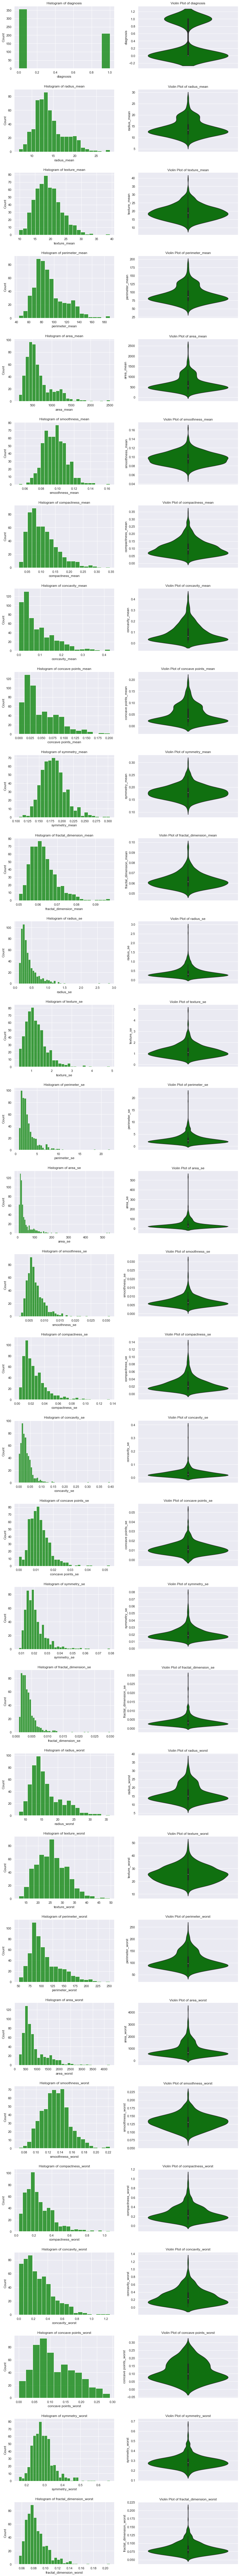

In [521]:
# Create subplots with two columns for each feature (histogram and violin plot)
num_rows, num_cols = len(df.columns), 2
fig_height, fig_width = num_rows * 4, 12
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(fig_width, fig_height))

# Iterate through each feature
for i, feature in enumerate(df.columns):
    # Histogram on the left
    sns.histplot(data=df, x=feature, ax=axes[i, 0], color='green')
    axes[i, 0].set_title(f'Histogram of {feature}')

    # Violin plot on the right
    sns.violinplot(data=df, y=feature, ax=axes[i, 1], color='green')
    axes[i, 1].set_title(f'Violin Plot of {feature}')

# Add spacing between subplots and show the plots
plt.tight_layout(pad=2.0)
plt.show()

## Data visualization (continued)

Explore relationships between the features and the target variable
* Box plots: bivariate distributions with outcome
* Correlation matrix
* Bar chart: Correlation coeffs with outcome
* Pairs plots: Checking for multicolinearity in highly-correlated features
* Variance inflation factors (VIF's)

### Box plots: bivariate distributions with outcome

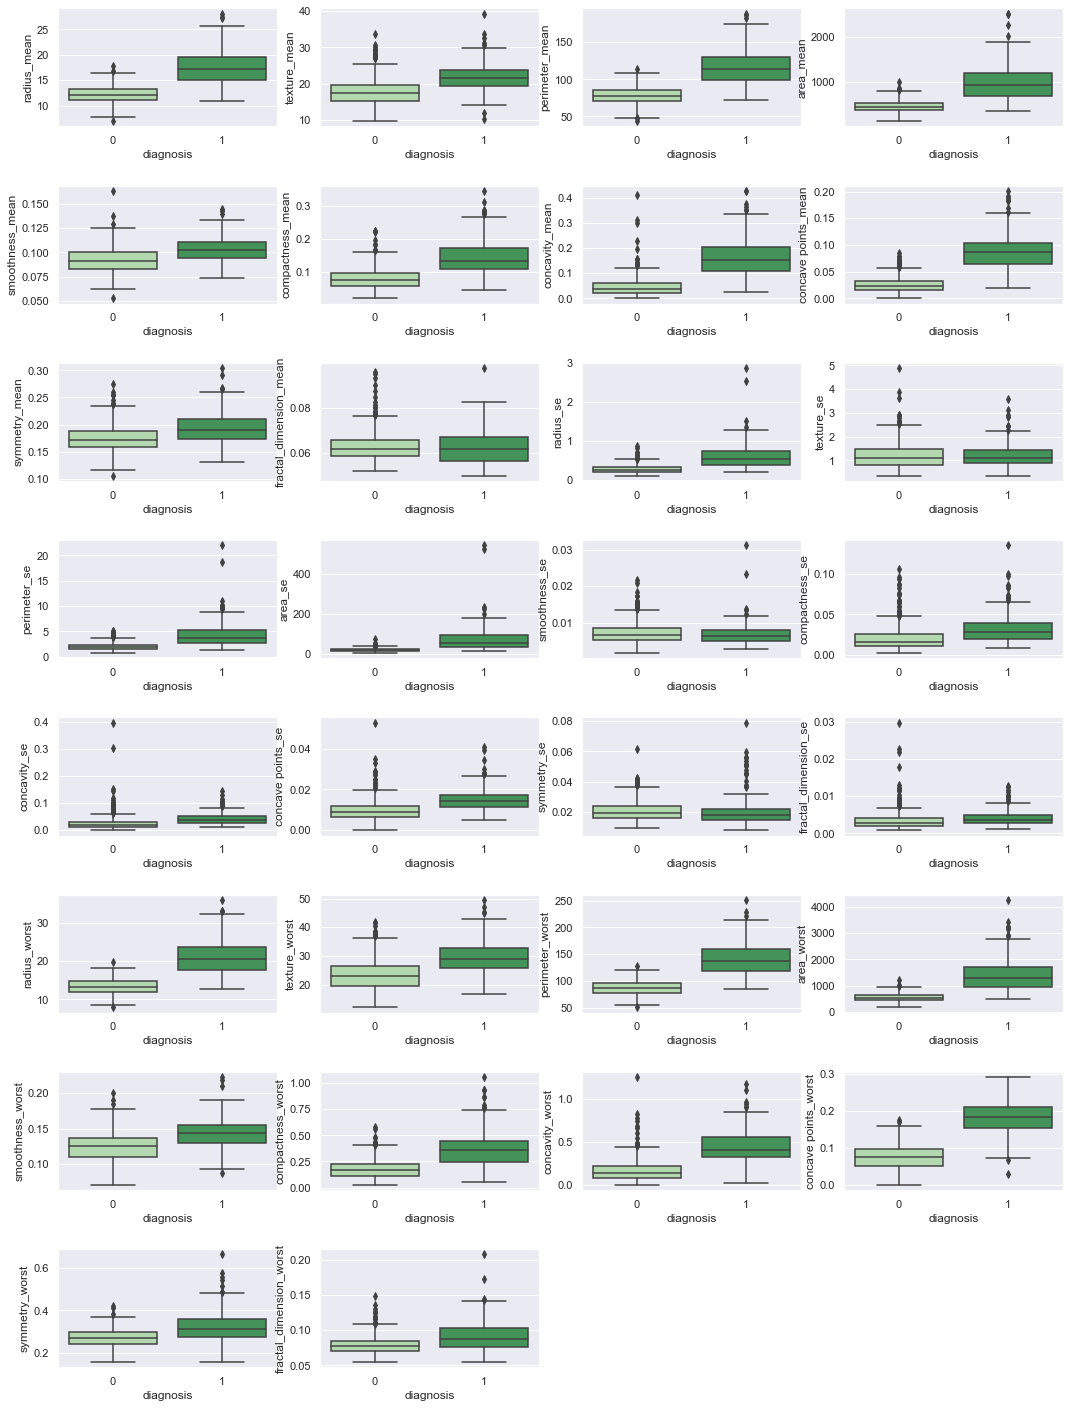

In [522]:
# Define a green color palette with different shades of green
green_palette = sns.color_palette("Greens", n_colors=2)

# Make the two boxplots for each predictor based on the outcome 
fig = plt.figure(figsize = (18,25))
rows, cols = 8, 4
plt.subplots_adjust(hspace=0.5) # vertical spacing between subplots
for i, col in enumerate(df.columns[1:]):
    ax = fig.add_subplot(rows, cols, i+1)
    sns.boxplot(data = df, x = 'diagnosis', y = col, ax = ax, palette=green_palette)

### Correlation matrix

<AxesSubplot:>

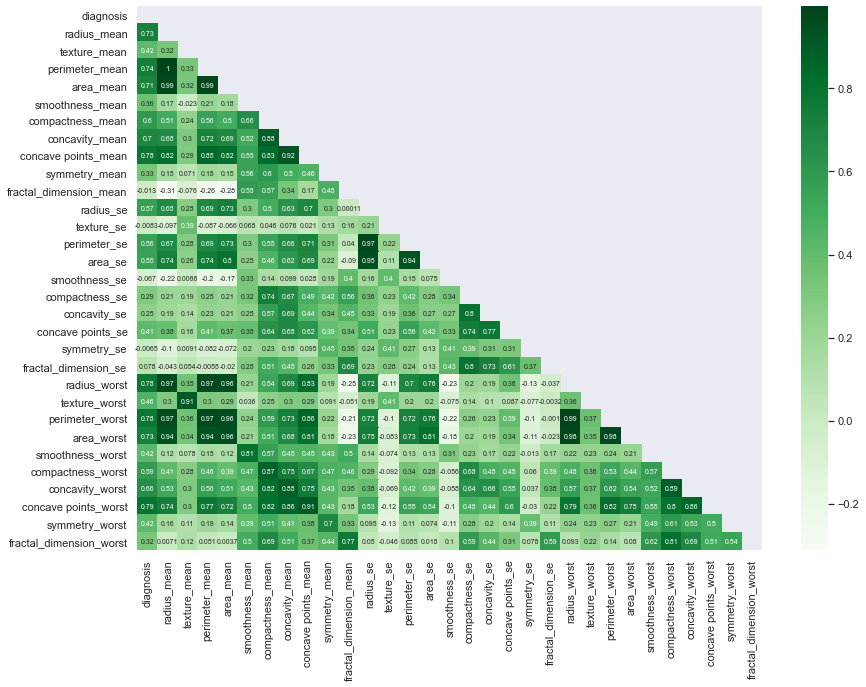

In [523]:
corr_matrix = df.corr()

# Make it easier to read: Mask the upper triangle of the correlation matrix 
ones_matrix = np.ones_like(corr_matrix, dtype=bool) # Create boolean matrix
upper_tri = np.triu(ones_matrix) # Get the upper triangle of the boolean matrix
plt.figure(figsize = (14,10))
sns.heatmap(corr_matrix, cmap='Greens', annot=True, mask = upper_tri, annot_kws={"size": 7})

### Bar chart: Correlation coeffs with outcome

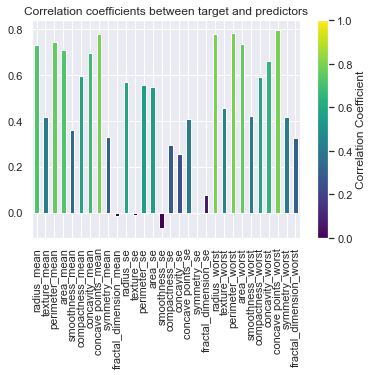

POOR PREDICTORS & THIER CORRELATION COEF. WITH THE TARGET:
fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64


In [524]:
# Create a colormap
cmap = cm.get_cmap('viridis', len(corr_values))

# Get the first row values from the correlation matrix (the correlation coeffs) 
# Start from column 1 (so exclude the target variable in column 0)
corr_values = corr_matrix.iloc[0,][1:] 

# Plot the correlation coeffs
#corr_values.plot(kind='bar', color=cm.cividis(corr_values))
corr_values.plot(kind='bar', color=cmap(corr_values))
plt.title('Correlation coefficients between target and predictors')

# Add a color scale bar
sm = cm.ScalarMappable(cmap=cm.viridis) # mapping between data values and colors
sm.set_array([])# sets array of data values that the ScalarMappable will map to colors
plt.colorbar(sm, orientation='vertical', label='Correlation Coefficient')

plt.show()

# Which features are poor predictors? 
print(f"POOR PREDICTORS & THIER CORRELATION COEF. WITH THE TARGET:\n{corr_values[corr_values <0.2]}")

### Pairs plots: Checking for multicolinearity

(569, 27)


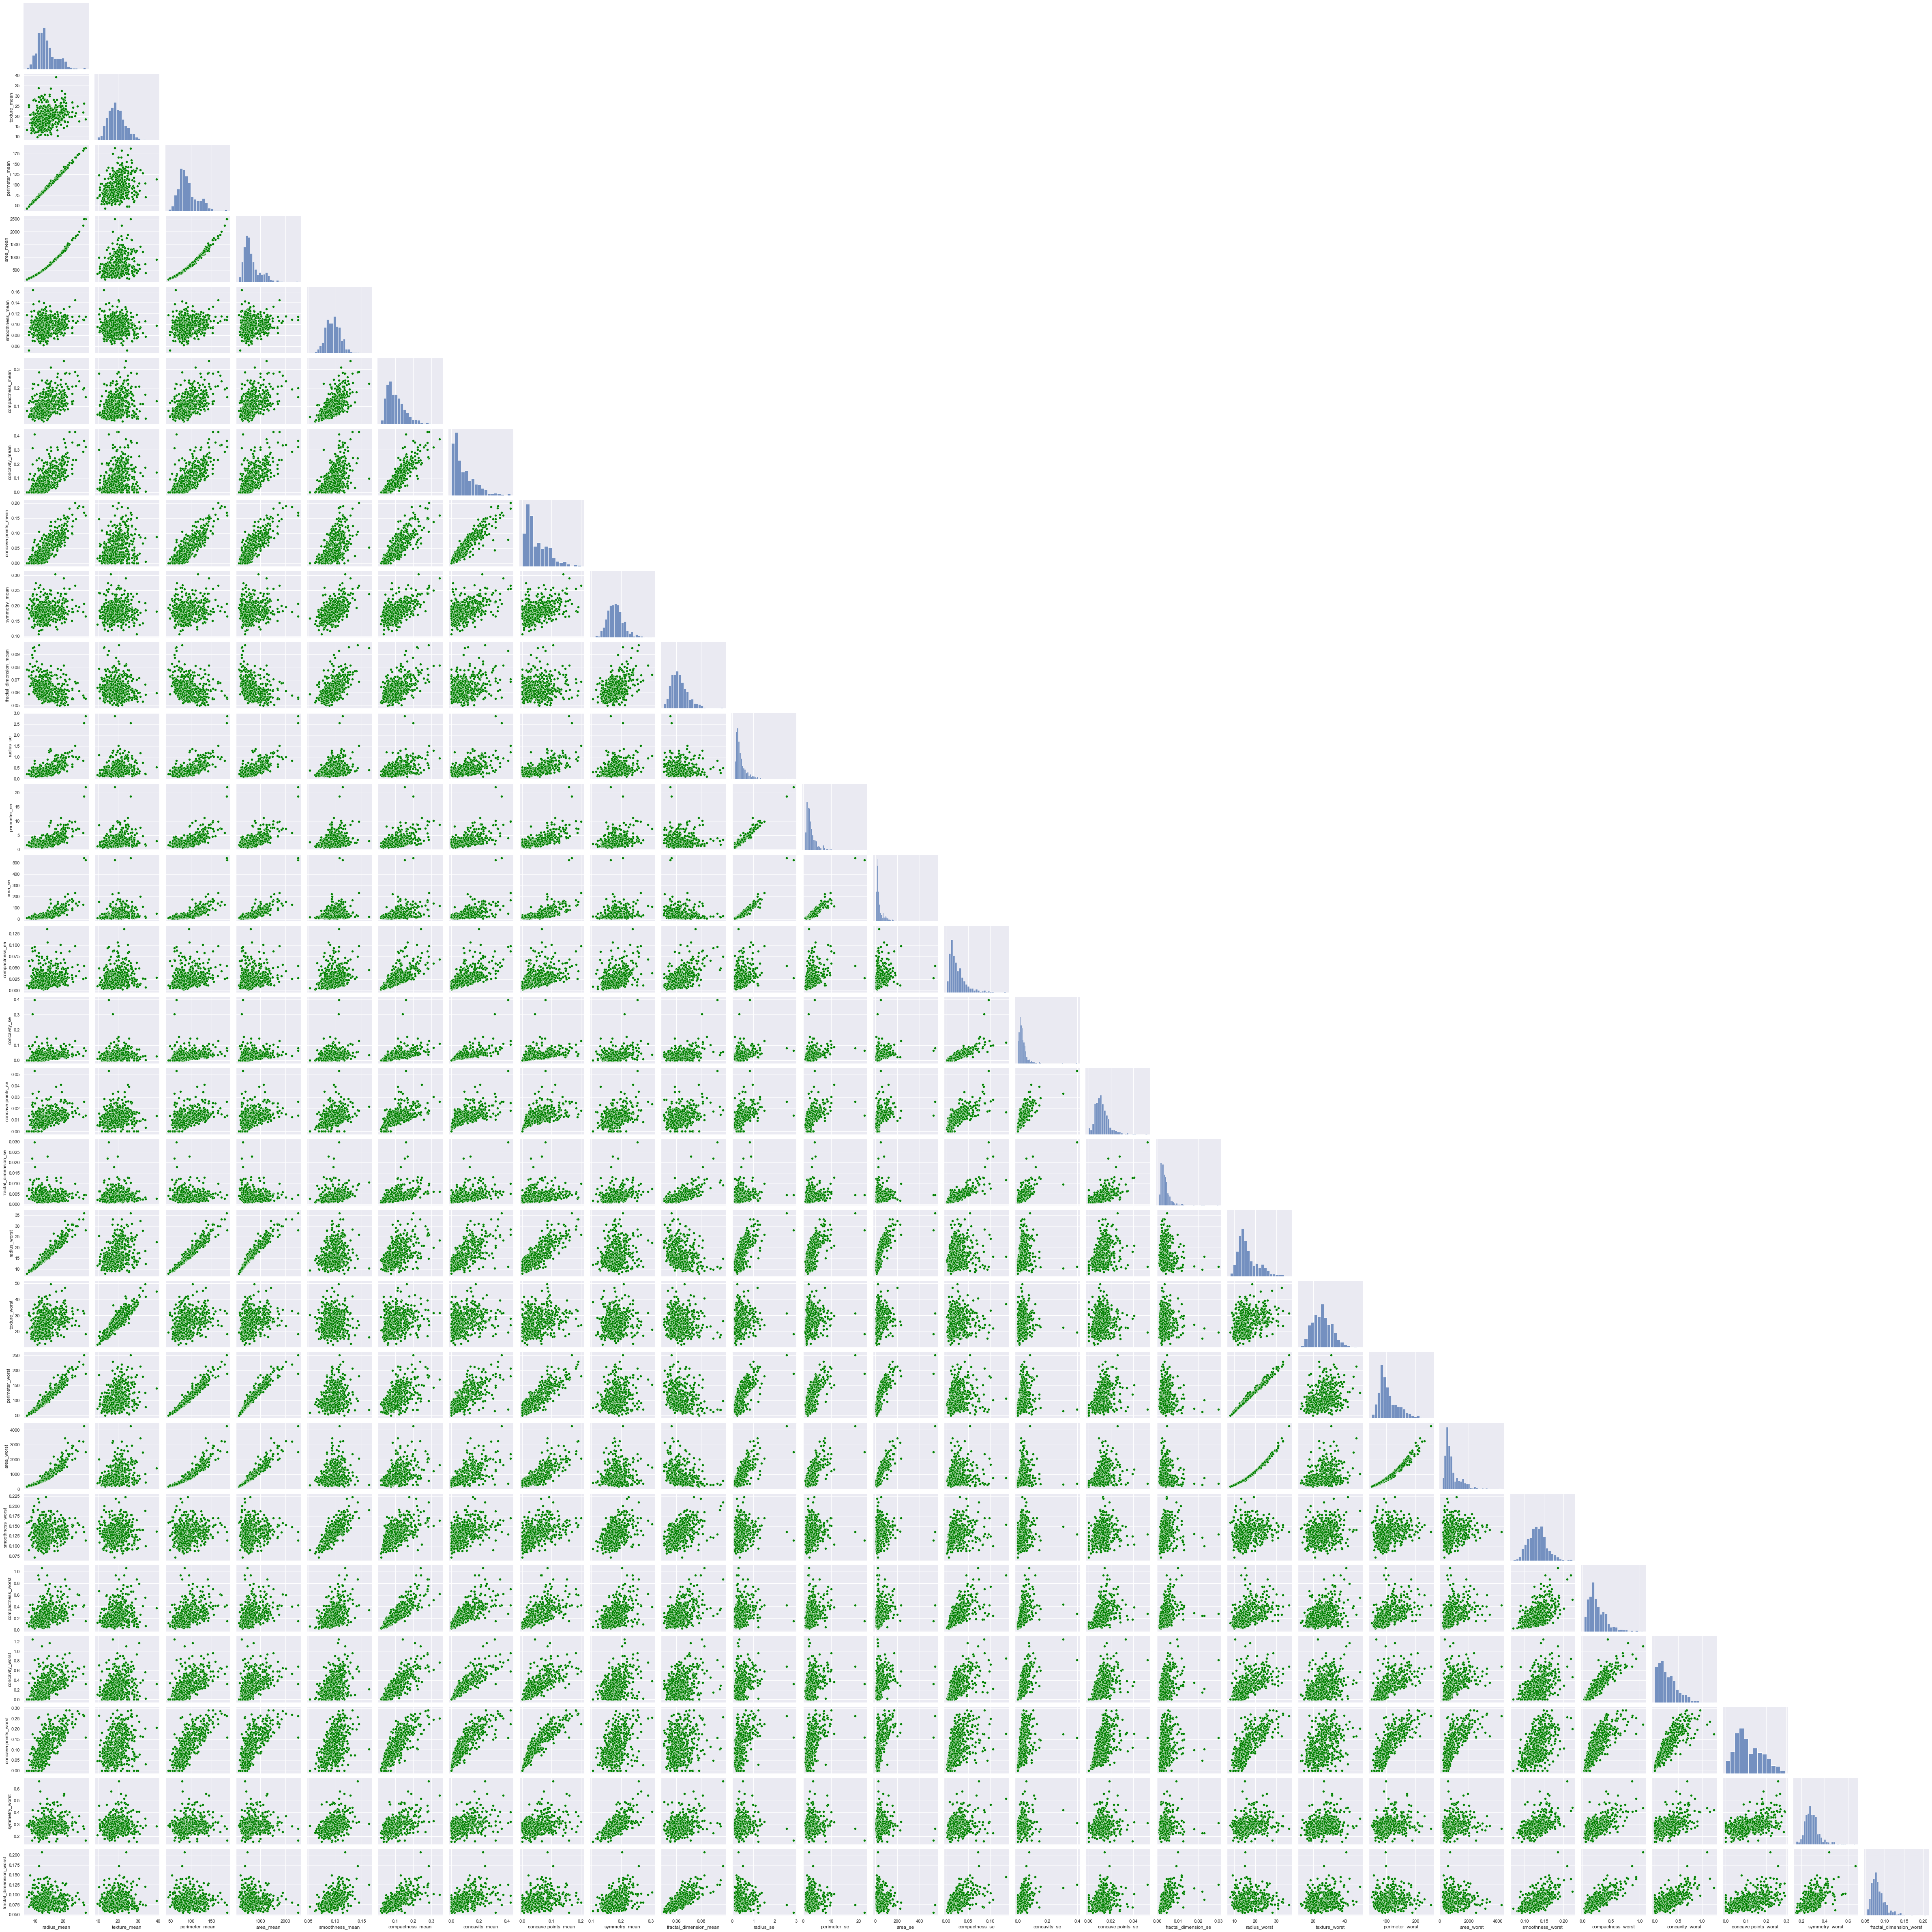

In [525]:
# Create a correlation matrix without the target variable. 
features_df = df.iloc[:, 1:]
features_corr_matrix = features_df.corr()

# Create a mask to identify features with correlation greater than 0.5
# Use the mask to filter the columns (features) from the original DataFrame
mask = (features_corr_matrix.abs() > 0.5) & (features_corr_matrix.abs() < 1.0)
correlated_features_df = features_df.loc[:, mask.any()]

# Print the DataFrame containing correlated features
print(correlated_features_df.shape)
sns.pairplot(correlated_features_df, hue=None, corner=True, plot_kws={'color': 'green'})
plt.show()

### Variance inflation factors (VIF's)

The **Variance Inflation Factor (VIF)** is a statistical measure that quantifies the extent to which each predictor variable within a multiple linear regression model can be predicted or explained by the other predictor variables. It assesses the degree of linear dependence or multicollinearity among predictor variables, helping to identify if one predictor can be predicted, to a high degree, based on the others.

The following equation is used to calculate VIF:

VIF = 1 / (1 - R²)

Where R² is the coefficient of determination obtained by regressing the predictor variable against all the other predictor variables in the model.

In [526]:
# Get the VIF values
vif_values = [vif(df.values, i) for i in range(len(df.columns))]

vif_df = pd.DataFrame({'Predictors': df.columns,
                      'VIF': vif_values})

## Check vifs 
print(vif_df.sort_values('VIF', ascending = False))

                 Predictors           VIF
1               radius_mean  63787.228031
3            perimeter_mean  58217.307016
21             radius_worst   9960.892269
23          perimeter_worst   4494.531141
4                 area_mean   1305.508785
24               area_worst   1164.089106
10   fractal_dimension_mean    654.870560
30  fractal_dimension_worst    427.226418
5           smoothness_mean    393.410071
25         smoothness_worst    375.598751
22            texture_worst    343.506199
2              texture_mean    251.122570
11                radius_se    237.352381
29           symmetry_worst    219.571466
13             perimeter_se    211.429834
6          compactness_mean    201.524726
9             symmetry_mean    184.542087
7            concavity_mean    158.130682
8       concave points_mean    154.891431
28     concave points_worst    148.765592
26        compactness_worst    132.894041
27          concavity_worst     86.721758
14                  area_se     72

As a general guideline, it's recommended that the VIF's should not exceed 5, as values greater than this threshold indicate a high level of multicollinearity. Given that there are numerous VIF values exceeding 5 in this dataset, it can be reasonably inferred that the dataset exhibits a significant degree of multicollinearity.

## Feature engineering, outliers, and scaling

* Create new features if needed
* Identify and handle outliers
* Decide if normalization or scaling is necessary

### Feature engineering

Given the high dimensionality of the dataset and the inherent dependencies between many of the existing features (such as "area," "radius," and "perimeter" variables), additional feature engineering may not be necessary. Moreover, the choice of using logistic regression models with Lasso regularization and Support Vector Machines (SVM) offers an advantage: these models can automatically handle feature selection and regularization, even in high-dimensional scenarios.

### Outliers

#### Notes on outlier effects in logistic regression and SVM

Lasso regularization can make logistic regression somewhat robust to outliers, but it may not handle extreme outliers well. Robustness can vary based on the degree of regularization (controlled by the regularization parameter, C or alpha

The RBF kernel, with its radial basis function, is usually less sensitive to outliers compared to linear SVMs. However, extreme outliers can still have some impact. The SVM tries to maximize the margin between support vectors and the decision boundary. Outliers can become support vectors, and if they are misclassified, they can reduce the margin.

To **identify outliers**, I will utilize **Z-scores**, a statistical measure that quantifies how many standard deviations a data point deviates from the dataset's mean. Data points exhibiting Z-scores above a designated threshold, such as 2 or -2, will be classified as outliers.

#### Z-scores

In [527]:
# Calculate the Z-score for each data point in each column. 
z_scores = np.abs(stats.zscore(features_df))
outlier_indices = np.where(z_scores > 2)
outliers = [(row, col, df.iloc[row, col]) for row, col in zip(*outlier_indices_z)]

# Create a set to store unique row indices with outliers
unique_outlier_rows = set()

# Iterate through the outlier_IQR list and add unique row indices to the set
for row, _, _ in outliers_Zscores:
    unique_outlier_rows.add(row)

# Convert the set to a list to obtain the unique row indices
unique_outlier_indices = list(unique_outlier_rows)

# print the results
print("Number of outliers: ", len(unique_outlier_indices))
print("Proportion of outliers: ", len(unique_outlier_indices_z)/len(df))
print("Unique outlier row indices: \n", unique_outlier_indices)

Number of outliers:  187
Proportion of outliers:  0.3286467486818981
Unique outlier row indices: 
 [0, 2, 3, 5, 8, 9, 520, 521, 12, 14, 15, 528, 17, 18, 22, 23, 24, 25, 26, 535, 28, 539, 31, 543, 33, 34, 35, 37, 38, 552, 41, 42, 553, 554, 45, 557, 47, 559, 561, 562, 563, 564, 565, 566, 567, 56, 568, 60, 62, 63, 64, 68, 71, 72, 76, 77, 78, 82, 83, 101, 105, 108, 110, 112, 113, 116, 117, 118, 119, 122, 129, 136, 138, 145, 146, 147, 150, 151, 152, 161, 162, 164, 166, 168, 172, 173, 176, 178, 180, 181, 183, 185, 190, 192, 193, 196, 199, 202, 203, 210, 212, 213, 214, 219, 229, 230, 232, 236, 238, 239, 242, 245, 247, 250, 252, 256, 257, 258, 259, 260, 265, 270, 272, 273, 275, 280, 288, 290, 298, 300, 302, 313, 314, 315, 318, 319, 323, 329, 332, 339, 343, 345, 349, 351, 352, 366, 368, 369, 370, 372, 376, 377, 379, 382, 387, 388, 389, 391, 393, 400, 414, 416, 417, 424, 430, 443, 446, 449, 450, 452, 455, 456, 459, 461, 465, 468, 469, 471, 473, 485, 489, 491, 501, 503, 504, 505, 507]


Wow, there are a lot of outliers! The outliers can be visualtized in the violin plots above. At this time, rather than investigate each outlier further, I will continue on to the model construction. If either of the models perform poorly, this may be something worth revisiting. 

I used the code below and adjusted the proportion of outliers to drop (controlled by the contamination parameter in the IsolationForest) to determine if this makes a difference in the models' performance. 

#### Notes on Isolation Forests

An Isolation Forest is an unsupervised machine learning algorithm used for outlier detection. It works by identifying anomalies or outliers in a dataset by isolating them from the majority of data points. It is particularly effective at finding anomalies in high-dimensional datasets. Here's how an Isolation Forest works:

**Random Selection of Data Points:** The algorithm starts by randomly selecting a subset of data points from the dataset. These randomly selected data points will be used to create isolation trees. The process of creating isolation trees is repeated multiple times to create a forest of such trees.

**Construction of Isolation Trees:**
1. A random feature is selected from the dataset.
2. A random split value within the range of the selected feature's values is chosen. This split value will be used to partition the data into two subsets.
3. The data points are divided into two subsets: one where the selected feature's value is less than the chosen split value, and another where the value is greater.
4. Steps a-c are repeated recursively for the subsets until a stopping criterion is met. This stopping criterion could be a maximum tree depth, a minimum number of data points in a leaf node, or other criteria.

**Anomaly Score Calculation:** To identify outliers, the algorithm calculates an anomaly score for each data point. The anomaly score is based on the depth at which a data point is isolated in the trees. Data points that can be isolated with fewer splits (i.e., they have shorter paths in the trees) are likely to be anomalies, while those that require many splits are likely to be inliers. The anomaly score is a measure of how isolated or "far" a data point is from the majority of data points. Lower scores indicate outliers, while higher scores indicate inliers.

**Thresholding and Labeling:** Once the anomaly scores are calculated, a threshold is set to classify data points as outliers or inliers. Data points with anomaly scores below the threshold are classified as outliers, while those with scores above the threshold are classified as inliers.

**Output:** The algorithm outputs the labels (outlier or inlier) for each data point, indicating which data points are considered outliers.

**Key Advantages** of Isolation Forest:
* It is efficient and scales well to high-dimensional datasets.
* It does not rely on assumptions about the distribution of data.
* It can handle both global and local outliers effectively.

**Limitations:**
* The performance can be sensitive to the choice of hyperparameters, such as the number of trees and the depth of trees.
* Isolation Forest may not work as well on datasets with very low outlier proportions.
* It may struggle to detect anomalies that are close to other data points.

#### Isolation forests

I used the code below and adjusted the proportion of outliers to drop (controlled by the contamination parameter in the IsolationForest) to determine if this makes a difference in the models' performance.

In [528]:
from sklearn.ensemble import IsolationForest

# Create an Isolation Forest model
# "contamination" controls the expected proportion of outliers in your dataset.
isolation_forest = IsolationForest(contamination=0.03) 

# Fit the model to the data
isolation_forest.fit(X_test)

# Predict outlier labels (1 for inliers, -1 for outliers)
outlier_labels = isolation_forest.predict(X)                                         

# Count the number of outliers
num_outliers = (outlier_labels == -1).sum()
print(f"Number of outliers: {num_outliers}")

# Get the indices of outliers (where outlier_labels == -1)
outlier_indices = np.where(outlier_labels == -1)[0]

# Print or use the outlier indices as needed
print("Indices of outliers:", outlier_indices)

# Uncomment to drop outliers
#features_df = features_df.drop(outlier_indices)
#df = df.drop(outlier_indices)

Number of outliers: 20
Indices of outliers: [ 21 103 168 188 221 235 237 249 256 274 349 350 360 374 381 448 483 501
 541 542]


### Scaling

Decide if normalization or scaling is necessary:

Since the features exhibit significant variations in their scales, with the area and perimeter-related variables being notably larger in scale compared to the others, I'm scaling all the features so that they have a mean of 0 and a standard deviation of 1

In [529]:
# Scale features to have a mean of 0 and a standard deviation of 1. 
from sklearn.preprocessing import StandardScaler
features_scaled = pd.DataFrame(StandardScaler().fit_transform(features_df), columns=features_df.columns)
features_scaled.describe()

radius_mean  texture_mean  perimeter_mean     area_mean  \
count  5.690000e+02  5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.256562e-16  1.049736e-16   -1.272171e-16 -1.900452e-16   
std    1.000880e+00  1.000880e+00    1.000880e+00  1.000880e+00   
min   -2.029648e+00 -2.229249e+00   -1.984504e+00 -1.454443e+00   
25%   -6.893853e-01 -7.259631e-01   -6.919555e-01 -6.671955e-01   
50%   -2.150816e-01 -1.046362e-01   -2.359800e-01 -2.951869e-01   
75%    4.693926e-01  5.841756e-01    4.996769e-01  3.635073e-01   
max    3.971288e+00  4.651889e+00    3.976130e+00  5.250529e+00   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count     5.690000e+02      5.690000e+02    5.690000e+02         5.690000e+02   
mean     -8.226187e-16      2.419467e-16   -1.315097e-16        -8.780323e-17   
std       1.000880e+00      1.000880e+00    1.000880e+00         1.000880e+00   
min      -3.112085e+00     -1.610136e+00   -1.114873e+00        -1.261820e+00   
25%      -7.109628e-01     -7.470860e-01   -7.437479e-01        -7.379438e-01   
50%      -3.489108e-02     -2.219405e-01   -3.422399e-01        -3.977212e-01   
75%       6.361990e-01      4.938569e-01    5.260619e-01         6.469351e-01   
max       4.770911e+00      4.568425e+00    4.243589e+00         3.927930e+00   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count   5.690000e+02            5.690000e+02  ...  5.690000e+02   
mean    1.957036e-16            5.073075e-16  ... -7.956924e-16   
std     1.000880e+00            1.000880e+00  ...  1.000880e+00   
min    -2.744117e+00           -1.819865e+00  ... -1.726901e+00   
25%    -7.032397e-01           -7.226392e-01  ... -6.749213e-01   
50%    -7.162650e-02           -1.782793e-01  ... -2.690395e-01   
75%     5.307792e-01            4.709834e-01  ...  5.220158e-01   
max     4.484751e+00            4.910919e+00  ...  4.094189e+00   

       texture_worst  perimeter_worst    area_worst  smoothness_worst  \
count   5.690000e+02     5.690000e+02  5.690000e+02      5.690000e+02   
mean   -1.834112e-17    -4.015534e-16 -2.848727e-17     -2.251665e-16   
std     1.000880e+00     1.000880e+00  1.000880e+00      1.000880e+00   
min    -2.223994e+00    -1.693361e+00 -1.222423e+00     -2.682695e+00   
25%    -7.486293e-01    -6.895783e-01 -6.421359e-01     -6.912304e-01   
50%    -4.351564e-02    -2.859802e-01 -3.411812e-01     -4.684277e-02   
75%     6.583411e-01     5.402790e-01  3.575891e-01      5.975448e-01   
max     3.885905e+00     4.287337e+00  5.930172e+00      3.955374e+00   

       compactness_worst  concavity_worst  concave points_worst  \
count       5.690000e+02     5.690000e+02          5.690000e+02   
mean       -2.579464e-16     1.143393e-16          3.203842e-16   
std         1.000880e+00     1.000880e+00          1.000880e+00   
min        -1.443878e+00    -1.305831e+00         -1.745063e+00   
25%        -6.810833e-01    -7.565142e-01         -7.563999e-01   
50%        -2.695009e-01    -2.182321e-01         -2.234689e-01   
75%         5.396688e-01     5.311411e-01          7.125100e-01   
max         5.112877e+00     4.700669e+00          2.685877e+00   

       symmetry_worst  fractal_dimension_worst  
count    5.690000e+02             5.690000e+02  
mean     1.783381e-16            -6.436952e-16  
std      1.000880e+00             1.000880e+00  
min     -2.160960e+00            -1.601839e+00  
25%     -6.418637e-01            -6.919118e-01  
50%     -1.274095e-01            -2.164441e-01  
75%      4.501382e-01             4.507624e-01  
max      6.046041e+00             6.846856e+00  

[8 rows x 30 columns]

## Data splitting

Split the dataset into training and testing sets. Typically, a common split is 80% for training and 20% for testing.

In [530]:
X = features_scaled
y = df.diagnosis
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print("Number of observations (X) in the training data: ", len(X_train))
print("Number of observations (y) in the training data: ", len(y_train))
print("Number of observations (X) in the testing data: ", len(X_test))
print("Number of observations (y) in the testing data: ", len(y_test))

Number of observations (X) in the training data:  455
Number of observations (y) in the training data:  455
Number of observations (X) in the testing data:  114
Number of observations (y) in the testing data:  114


## Model selection

* Choose appropriate regression algorithms such as Linear Regression, Decision Trees, Random Forests, Gradient Boosting, etc.
* Consider training multiple models to compare their performance
* For this dataset:
  * Logistic regression: This model could face challenges related to high dimensionality and multicollinearity. A potential solution is to employ Lasso regularization methods.
  * SVM: This model exhibits reduced sensitivity to multicollinearity, particularly when using non-linear SVMs like RBF kernels.

### Logistic Regression with Lasso Regularization (aka LRLR)

Why choose this model?

**Feature Selection:** Lasso regularization penalizes the absolute values of the coefficients of the features. As a result, it tends to push the coefficients of less informative or highly correlated features towards zero. In practice, this means that Lasso will automatically select a subset of features while setting the coefficients of irrelevant or redundant features to zero.

**Multicollinearity Mitigation:** When you have highly correlated features, Lasso will tend to select one of them (typically the one that provides more predictive power) and set the coefficients of the others to zero. This helps mitigate multicollinearity by effectively choosing one representative feature from the correlated group.

**Model Interpretability:** Lasso regularization, by reducing the number of features and coefficients, often leads to a more interpretable model. It simplifies the model by removing redundant information and focuses on the most relevant predictors.

**Tuning:** The effectiveness of Lasso in feature selection and multicollinearity mitigation depends on the strength of the regularization parameter (alpha). In this project, I tune the alpha parameter to achieve the desired level of feature selection and multicollinearity reduction.

### Support Vector Machine with a Radial Basis Function (Gaussian) Kernel (aka SVM)

Why choose this model?

**Non-linearity:** SVM can capture non-linearity**, whereas Logistic Regression assumes linearity.

**Robustness to Outliers:** SVM's robustness to outliers is bolstered by its utilization of support vectors and the concept of a soft margin. This characteristic makes SVM a reliable choice when dealing with data that contains outliers.

In cases with a large sample-to-feature ratio, such as the one at hand, employing an SVM with a Gaussian kernel often proves effective. However, it's essential to acknowledge that interpretability may be limited compared to Logistic Regression.

**Tuning:** In real-world datasets, perfect linear separability is rare. To enhance generalization, we permit some misclassification, a parameter controlled by 'C.' A large 'C' penalizes misclassification heavily, akin to a hard-margin classifier, while a small 'C' is more forgiving, resembling a soft-margin classifier. Tuning the 'C' parameter is of paramount importance as it determines the delicate balance between minimizing misclassification and fostering model generalization.

## Model training

* Use GridSearchCV to determine the optimal model parameters and perform k-fold cross validation
* Use the training data set to train the model
* Which features are important?

### LRLR Training

#### LRLR: Use GridSearchCV to determine the optimal model parameters and perform k-fold cross validation

In [547]:
# Logistic Regression with Lasso Regularization

# Initialize the model using the l1 penalty and saga solver (for Lasso regularisation)
model_LRLR_init = LogisticRegression(penalty = 'l1', solver='saga', max_iter = 10000) 

# Select values used for C
param_grid = {'C': np.logspace(-1,1,10)} 

# Initialize the grid search object
# cv : int, cross-validation generator or an iterable (I am using 5-fold cross validation)
gridsearch = GridSearchCV(model_LRLR_init, param_grid, cv = 10)

# Train the model on the training data
gridsearch.fit(X_train, y_train)

# Trained model results
print("Trained model results:")
print("Best C:", gridsearch.best_params_)
print("Best score:", gridsearch.best_score_)

# Save the best model from the tuning results
model_LRLR = gridsearch.best_estimator_ 

Trained model results:
Best C: {'C': 2.1544346900318834}
Best score: 0.9736714975845411


#### LRLR: Which features are important?

In [548]:
# Lasso coefficients

# Save the model's coefficients in a data frame
lasso_coeffs = model_LRLR.coef_
lasso_coeff_df = pd.DataFrame({'Predictors': features_scaled.columns,
                               'Lasso_coeffs': lasso_coeffs[0]})

lasso_coeff_df.sort_values(('Lasso_coeffs'), ascending = False)

# Consider Lasso Coefficients agains VIF values
# Does Lasso regularization "zero out" the predictors with the highest VIFs?

# Merge the VIF dataframe with the lasso coefficients dataframe 
vif_df = vif_df[vif_df['Predictors'] != 'diagnosis']
Lasso_coeffs_and_VIFs = vif_df.merge(lasso_coeff_df, left_on = 'Predictors', right_on= 'Predictors')
Lasso_coeffs_and_VIFs.sort_values(['Lasso_coeffs'])

Predictors           VIF  Lasso_coeffs
19     fractal_dimension_se     27.556836     -1.476428
11               texture_se     24.675389     -0.977346
15           compactness_se     44.979263     -0.433722
5          compactness_mean    201.524726     -0.132203
4           smoothness_mean    393.410071     -0.093045
0               radius_mean  63787.228031      0.000000
25        compactness_worst    132.894041      0.000000
18              symmetry_se     37.194742      0.000000
17        concave points_se     54.072023      0.000000
16             concavity_se     33.676991      0.000000
12             perimeter_se    211.429834      0.000000
29  fractal_dimension_worst    427.226418      0.000000
9    fractal_dimension_mean    654.870560      0.000000
1              texture_mean    251.122570      0.000000
2            perimeter_mean  58217.307016      0.000000
3                 area_mean   1305.508785      0.000000
8             symmetry_mean    184.542087      0.124500
22          perimeter_worst   4494.531141      0.191611
14            smoothness_se     26.395387      0.359718
26          concavity_worst     86.721758      0.397694
7       concave points_mean    154.891431      0.518649
28           symmetry_worst    219.571466      0.533880
10                radius_se    237.352381      0.954059
13                  area_se     72.669276      1.093591
24         smoothness_worst    375.598751      1.105534
27     concave points_worst    148.765592      1.378610
6            concavity_mean    158.130682      2.214931
21            texture_worst    343.506199      2.626737
23               area_worst   1164.089106      2.917036
20             radius_worst   9960.892269      3.386440

In [549]:
# Create a column that states if the predictors were zeroed out by Lasso
Lasso_coeffs_and_VIFs['Lasso_selected'] = (Lasso_coeffs_and_VIFs.Lasso_coeffs > 0).astype('int')

## Check
Lasso_coeffs_and_VIFs.Lasso_selected.value_counts()

0    16
1    14
Name: Lasso_selected, dtype: int64

In [550]:
# Difference in MEAN of VIF between selected and not 
Lasso_coeffs_and_VIFs.groupby('Lasso_selected')['VIF'].mean()

Lasso_selected
0    7862.792331
1    1259.118395
Name: VIF, dtype: float64

The observation that the average VIF of the lasso-removed features is greater than the average VIF of the lasso-kept features suggests that Lasso regularization effectively identified and removed features that had a higher degree of multicollinearity.

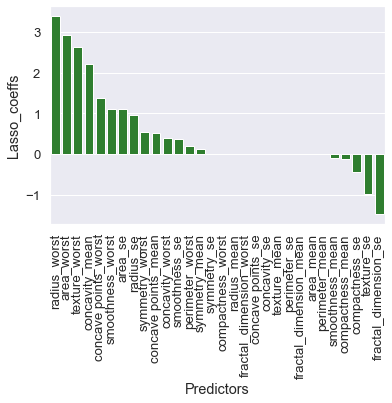

In [551]:
# Plot the lasso coefficients

# Set the color map. 
green_cmap = sns.color_palette("Greens", as_cmap=True)

sns.barplot(data = lasso_coeff_df.sort_values(by = 'Lasso_coeffs', ascending = False), 
            x = 'Predictors', y = 'Lasso_coeffs', color='forestgreen')

plt.xticks(rotation = 90)
plt.show()

### SVM Training 

#### Notes on the SVM parameters

**Gamma** is a hyperparameter in the RBF (Radial Basis Function) kernel used by the SVM. It controls the shape of the decision boundary. Specifically, it determines how far the influence of a single training example reaches. A small gamma means that the decision boundary is more flexible and can adapt to the local structure of the data, potentially leading to overfitting. A larger gamma makes the decision boundary smoother and more global, which can help prevent overfitting. In your case, a gamma value of 0.03125 is a relatively small value, indicating a more flexible decision boundary.

The **C** parameter in SVM is the regularization parameter. It controls the trade-off between maximizing the margin (separation between classes) and minimizing the classification error on the training data. A small C value allows for a larger margin but may tolerate some misclassification on the training data, potentially leading to underfitting. In contrast, a larger C value tries to minimize the misclassification on the training data, potentially leading to a smaller margin and overfitting. An optimal C value depends on the dataset and the problem you are trying to solve. In your case, a C value of 8 indicates a moderate level of regularization.

These values are the result of the grid search's attempt to balance model complexity and generalization performance on your training data. Evaluate the performance of this model on a separate test dataset to ensure it generalizes well to unseen data.

#### SVM: Use GridSearchCV to determine the optimal model parameters and perform k-fold cross validation

Best C: 2
Best Gamma: 0.03125
Best Score: 0.9735748792270531


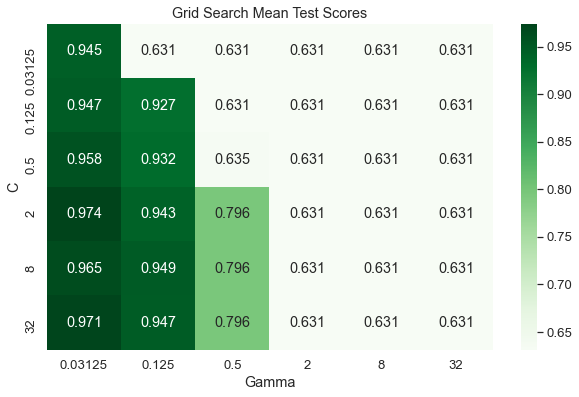

In [552]:
# Create a dictionary that defines the set of hyperparameters used in GridSearchCV
log_range = [2**-5, 2**-3, 2**-1, 2**1, 2**3, 2**5] 
param_grid = {'C': log_range, 'gamma': log_range}

# perform the grid search
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=10)
grid.fit(X_train, y_train)

# Print the best gamma and its corresponding score
best_C = grid.best_params_['C']
best_gamma = grid.best_params_['gamma']
best_score = grid.best_score_
print(f"Best C: {best_C}")
print(f"Best Gamma: {best_gamma}")
print(f"Best Score: {best_score}")

# Extract the results of the grid search
results = grid.cv_results_
scores = np.array(results['mean_test_score']).reshape(len(log_range), len(log_range))

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.2)
sns.heatmap(scores, annot=True, fmt=".3f", cmap="Greens", xticklabels=log_range, yticklabels=log_range)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Grid Search Mean Test Scores')
plt.show()

#### Create the SVM with the best parameters

In [553]:
# Create a new SVM model with the best parameters
model_SVM = SVC(kernel='rbf', C=best_C, gamma=best_gamma)

# Fit the SVM model to the training data
model_SVM.fit(X_train, y_train)

SVC(C=2, gamma=0.03125)

#### SVM: Which features are important?

How can I determine feature importance? One approach is support vector analysis. Support vectors, being the data points closest to the decision boundary, play a pivotal role in defining it. By thoroughly examining the distribution and characteristics of these support vectors, I may be able to gain some insight about the features that most significantly influence the model's decision-making process.

In [554]:
support_vectors = svm_model.support_vectors_
len(support_vectors)

96

Hmmm... that's a lot of support vectors! Also, each support vector represents 30 tumor features, so analyzing the distribution and characteristics of these support vectors may not be feasible. If only there was another way to see which features are important...

Since I cannot just look at fit coefficients in a SVM to determine feature importance like I can in logistic regression, I use the permutation_importance function from scikit-learn.

With this method, the values for each feature in the dataset are randomly shuffled across all data points in dataset, effectively destroying any relationship between the feature and the target variable since the feature's values are no longer aligned with the correct target values. The modified test dataset with the shuffled feature is used to make predictions using the trained model. Then the model's performance using the shuffled feature is compared to the model's performance using the unshuffled feature. If the feature is essential for the model's performance, shuffling it should significantly reduce the model's performance. To obtain robust results, the process is repeated multiple times, and the results are averaged over these repetitions. this is done for each feature. The importance score for each feature is calculated based on the reduction in model performance when that specific feature is shuffled.

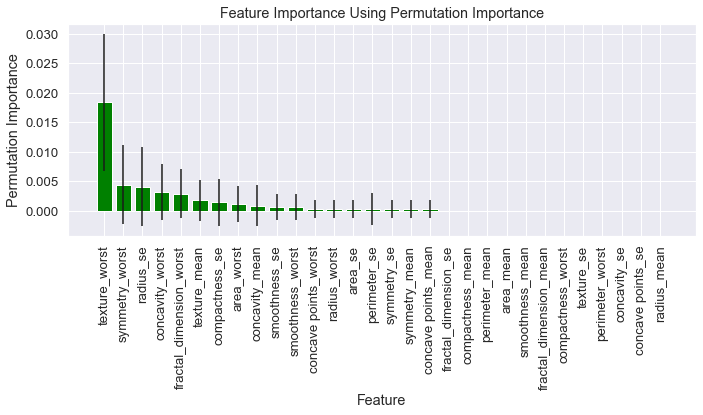

In [555]:
perm_importance = permutation_importance(svm_model, X_test, y_test, n_repeats=30, random_state=0)

# Get the feature names
feature_names = X_test.columns.tolist() if hasattr(X_test, 'columns') else list(range(X_test.shape[1]))

# Extract the importances and standard deviations from perm_importance
importances = perm_importance.importances_mean
std_devs = perm_importance.importances_std

# Sort the features by importance
sorted_indices = importances.argsort()[::-1]

# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), importances[sorted_indices], yerr=std_devs[sorted_indices], color='green')
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Feature Importance Using Permutation Importance')
plt.tight_layout()
plt.show()

Each bar represents the permutation importance of a feature. The error bars show the standard deviation of the importances, providing an estimate of the variability.

Features with higher permutation importance values are more influential in making predictions, while those with lower values are less influential.

## Model validation

* Use the model to make predictions with the features from the testing dataset. Compare the predicted classifications to the actual classifications.
* Confusion Matrix
* Log Loss
* Consider the effect of extreme outliers.

### Accuracy and Confusion Matrix

#### Notes on the classification_report function from the sklearn.metrics library

**Precision:** Precision measures the accuracy of positive predictions for a specific class. It's calculated as the ratio of true positives to the sum of true positives and false positives. Precision answers the question: "Of all the instances predicted as class X, how many were actually class X?" Precision = TP/(TP+FP)

**Recall (Sensitivity or True Positive Rate):** Recall measures the ability of the model to correctly identify all instances of a specific class. It's calculated as the ratio of true positives to the sum of true positives and false negatives. Recall answers the question: "Of all the instances that are actually class X, how many did the model correctly classify as class X?" recall = TP/(TP+FN)

**F1-Score:** The F1-score is the harmonic mean of precision and recall. It balances both precision and recall and is particularly useful when you want to find a balance between minimizing false positives and false negatives. F1-Score = 2PrecisionRecall/(Precision+Recall)

**Support:** Support is the number of actual occurrences of the class in the test dataset. It's the sum of true positives and false negatives.

**Accuracy:** Accuracy is the overall accuracy of the model, calculated as the ratio of correct predictions to the total number of predictions. It measures how well the model performs across all classes. Accuracy = correct pred/total pred

**Macro-averaged metrics** treat all classes equally and do not take class imbalances into account. Each class contributes equally to the average, regardless of the number of samples in that class. This can be useful when you want to assess the overall performance of the model without biasing the evaluation towards the majority class

**Weighted-averaged metrics** account for class imbalances by giving more importance to classes with more samples. This is especially useful when you have imbalanced datasets, as it provides a more representative measure of overall model performance.

#### LRLR Accuracy and Confusion Matrix

       LRLR Train Predictions


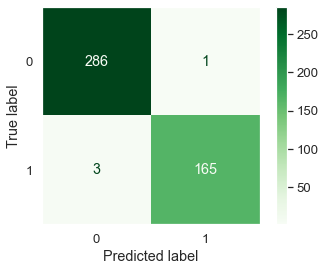

In [566]:
# Make predictions
model_LRLR_pred_train = model_LRLR.predict(X_train)
model_LRLR_pred_test = model_LRLR.predict(X_test)

# Training data
# Create the confusion matrix
cm_LRLR_train = confusion_matrix(y_train, model_LRLR_pred_train)
# Display the confusion matrix in a pretty green plot :D 
cm_LRLR_display = ConfusionMatrixDisplay(confusion_matrix=cm_LRLR_train)
print("       LRLR Train Predictions")
cm_LRLR_display.plot(cmap=plt.cm.Greens, values_format='d')  # Specify the custom color map and format
plt.grid(False) # Remove grid lines

Training data LRLR classification accuracy: 0.9912
Testing data LRLR classification accuracy: 0.9649

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        70
           1       0.98      0.93      0.95        44

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

       LRLR Test Predictions


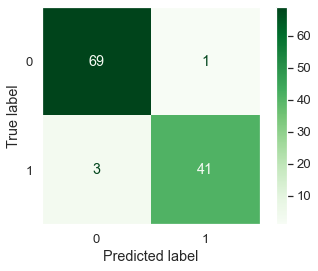

In [565]:
# Calculate the model's classification accuracy for both training & testing data subsets
accuracy_LRLR_train = model_LRLR.score(X_train, y_train)
accuracy_LRLR_test = model_LRLR.score(X_test, y_test)
print(f"Training data LRLR classification accuracy: {accuracy_LRLR_train:.4f}")
print(f"Testing data LRLR classification accuracy: {accuracy_LRLR_test:.4f}")

# Create a classification report
class_report_LRLR = classification_report(y_test, model_LRLR_pred_test)
print("\nClassification Report:\n", class_report_LRLR)

# Testing data
# Create the confusion matrix
cm_LRLR_test = confusion_matrix(y_test, model_LRLR_pred_test)
# Display the confusion matrix in a pretty green plot :D 
cm_LRLR_display = ConfusionMatrixDisplay(confusion_matrix=cm_LRLR_test)
print("       LRLR Test Predictions")
cm_LRLR_display.plot(cmap=plt.cm.Greens, values_format='d')  # Specify the custom color map and format
plt.grid(False) # Remove grid lines

       LRLR Train Predictions


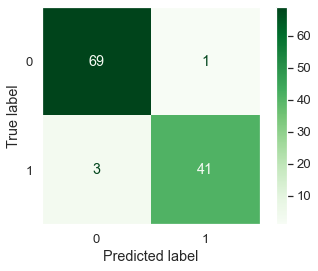

In [563]:
# Testing data
# Create the confusion matrix
cm_LRLR_test = confusion_matrix(y_test, model_LRLR_pred_test)
# Display the confusion matrix in a pretty green plot :D 
cm_LRLR_display = ConfusionMatrixDisplay(confusion_matrix=cm_LRLR_test)
print("       LRLR Train Predictions")
cm_LRLR_display.plot(cmap=plt.cm.Greens, values_format='d')  # Specify the custom color map and format
plt.grid(False) # Remove grid lines

#### SVM Accuracy and Confusion Matrix

       SVM Train Predictions


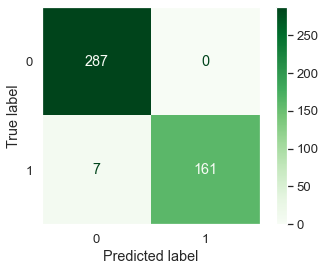

In [562]:
# Make predictions
model_SVM_pred_train = model_SVM.predict(X_train)
model_SVM_pred_test = model_SVM.predict(X_test)

# Training data
# Create the confusion matrix
cm_SVM_train = confusion_matrix(y_train, model_SVM_pred_train)
# Display the confusion matrix in a pretty green plot :D 
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM_train)
print("       SVM Train Predictions")
cm_disp.plot(cmap=plt.cm.Greens, values_format='d')
plt.grid(False) # Remove grid lines

Training data SVM classification accuracy: 0.9846
Testing data SVM classification accuracy: 0.9825

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        70
           1       1.00      0.95      0.98        44

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114

        SVM Test Predictions


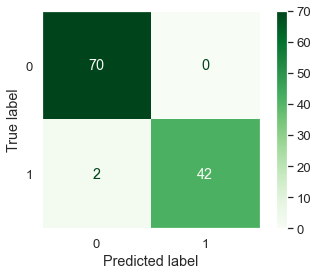

In [560]:
# Calculate the model's classification accuracy for both training & testing data subsets
accuracy_SVM_train = accuracy_score(y_train, model_SVM_pred_train)
accuracy_SVM_test = accuracy_score(y_test, model_SVM_pred_test)
print(f"Training data SVM classification accuracy: {accuracy_SVM_train:.4f}")
print(f"Testing data SVM classification accuracy: {accuracy_SVM_test:.4f}")

# Create a classification report
class_report = classification_report(y_test, model_SVM_pred_test)
print("\nClassification Report:\n", class_report)

# Testing data
# Create the confusion matrix
cm_SVM_test = confusion_matrix(y_test, model_SVM_pred_test)
# Display the confusion matrix in a pretty green plot :D 
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm_SVM_test)
print("        SVM Test Predictions")
cm_disp.plot(cmap=plt.cm.Greens, values_format='d')
plt.grid(False) # Remove grid lines

### Log-Loss

Log-loss (i.e. cross-entropy loss) quantifies how well the predicted probabilities match the true labels. A perfect model that assigns a probability of 1 to the correct class and 0 to all other classes would have a log-loss of 0. As the predicted probabilities deviate from the true labels, the log-loss increases. It heavily penalizes confident, incorrect predictions.

Loss = - (1/N) * ∑[y_i * log(p_i) + (1 - y_i) * log(1 - p_i)]

In [567]:
logloss_LRLR =log_loss(y_test, model_LRLR_pred_test)
logloss_SVM = log_loss(y_test, model_SVM_pred_test)

print(f'LRLR Log Loss: {logloss_LRLR:.4f}')
print( f'SVM Log Loss: {logloss_SVM:.4f}')

LRLR Log Loss: 1.2119
SVM Log Loss: 0.6059


### What about outliers?

Considering the high accuracy and low log-loss values of both models, I do not think it is necessary to revisit the outliers and perform further analysis. As long as the models can make accurate predictioins on the testing dataset, I do not see a good reason to drop any data points! 

But I tried anyway! Upon experimenting with the removal of various proportions of outliers using the IsolationForest function, I observed that the resultant models exhibited either equivalent or diminished performance compared to models trained and evaluated on the complete dataset, including outliers. 

## Conclusion 

Logistic Regression with Lasso regularization prioritizes sparse models, promoting feature selection by zeroing some feature coefficients. In the first model, Lasso explicitly identifies a subset of features, enhancing interpretability, and potentially capturing the most strongly associated features with the target variable. In contrast, the second model, SVM with an RBF kernel, does not inherently perform feature selection like Lasso. Instead, it operates in a high-dimensional space where all features contribute to the decision boundary, with feature importance influenced by data distribution. Variability in the dataset can also sway feature importance rankings, emphasizing different subsets of features. It's notable that both models often highlight features with "worst" or largest mean values, such as "texture_worst," as particularly important. Despite both models exhibiting equal accuracy, Logistic Regression with Lasso's feature selection might facilitate improved generalization, especially when handling new, unseen data, thanks to its pre-identified subset of influential features. However, given the severe consequences of misclassification in this specific problem, deploying these models for diagnosing breast tumors as benign or malignant would raise concerns.